It looks that the **uncertainties** package is ok for funzioni linearizzabili nell'intorno di dove sono calcolate --> aka vanno bene per errori piccoli 

Per roba piú raffinata vedi:
- **soerp**: second order error propagation --> apparently is still fast
- **mcerp**: monte carlo error propagation

TODOs:
- is the emittance function linear ? (do some plots)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[[ 0.00353429  0.00343594]
 [ 0.00343594  0.00343502]]
(array([  3.16410476e-06,   2.52637164e-06,   3.06357506e-06,
         2.64906725e-06,   2.65593977e-06,   1.54646467e-06,
         1.83882260e-06,   1.88743572e-06,   1.10224517e-06,
         1.40929834e-06,   1.47653059e-06,   9.36467384e-07,
         6.85754284e-07,   5.68012908e-07,   7.75257494e-07,
         4.80465643e-07,   6.11248935e-07,   4.09816084e-07,
         3.27013055e-07,   2.63733446e-07,   2.86280977e-07,
         2.26511621e-07,   4.97920126e-07,   2.10408479e-07,
         9.79041451e-08,   9.65880800e-08,   4.46804912e-08,
         2.90691617e-08,   1.86602724e-08,   6.23524761e-08,
         1.27647595e-08,   2.52039990e-08,   1.05795999e-08,
         1.36088207e-08,   2.99626510e-09,   2.72466680e-09,
         4.67477415e-09,   1.99806295e-09,   4.78885296e-09,
         6.68265364e-10,   6.14304283e-10,   9.82390968e-11,
         2.87720485e-09,   3.93920637e-10,   3.25993838e-10,
         2.02654681e-10,   2.

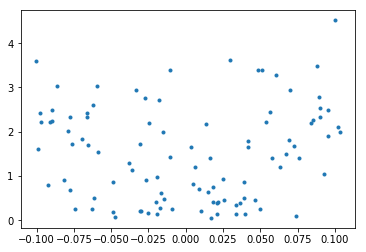

In [60]:
# generate the dataset
xdata1 = np.linspace(-0.1,0.1,100) + np.random.normal(0, .01, 100)
xdata2 = np.linspace(-3,3,100) + np.random.normal(0, 1.2, 100)
s_xdata1 = np.ones([1,100])*0.01
s_xdata2 = np.ones([1,100])*0.003
def theF(x1,x2):
    return (xdata1**2+xdata2**2)**0.5
ydata = theF(xdata1, xdata2)
# print(ydata)
plt.plot(xdata1, ydata,'.')

def theErr(x1, x2):
    cov = np.cov(x1,x2)
    print(cov)
    s_x1 = cov[0][0]
    s_x2 = cov[1][1]
    s_x1x2 = cov[0][1]
    
    D_x1 = x1*((x1**2+x2**2)**2)
    D_x2 = x2*((x1**2+x2**2)**2)
    
    uncorr_err = ((D_x1**2 * s_x1) + (D_x2**2 * s_x2))**0.5
    corr_err = ((D_x1**2 * s_x1) + (D_x2**2 * s_x2) - (2*D_x1*D_x2*s_x1x2))**0.5
    return uncorr_err, corr_err
ydata_err = theErr(xdata1,xdata)
print(ydata_err)